In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar100

In [2]:
NUM_CLASSES = 100

In [3]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

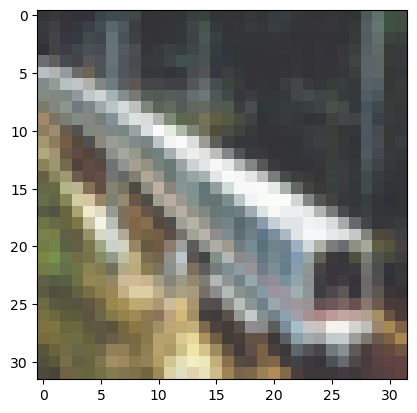

In [4]:
plt.imshow(x_train[6])

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES) 

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 100)

In [8]:
y_test.shape

(10000, 100)

In [9]:
input_layer = Input(shape=(32,32,3))

conv_layer = Conv2D(
    filters = 2,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_1 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer)

conv_layer_2 = Conv2D(
    filters = 30
    , kernel_size = (4,4)
    , strides = 4
    , padding = 'same'
    )(conv_layer_1)

conv_layer_3 = Conv2D(
    filters = 30
    , kernel_size = (4,4)
    , strides = 4
    , padding = 'same'
    )(conv_layer_2)

conv_layer_4 = Conv2D(
    filters = 30
    , kernel_size = (4,4)
    , strides = 4
    , padding = 'same'
    )(conv_layer_3)

flatten_layer = Flatten()(conv_layer_3)

In [10]:
output_layer = Dense(units=100, activation = 'softmax')(flatten_layer)

In [11]:
model = Model(input_layer,output_layer)

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 16, 16, 2)           │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 20)            │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 30)            │           9,630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 30)            │          14,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │           3,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,638 (107.96 KB)

 Trainable params: 27,638 (107.96 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
opt = Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,batch_size=32,epochs=15,shuffle=True)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.0446 - loss: 4.3599
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1227 - loss: 3.8411
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1395 - loss: 3.7638
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1473 - loss: 3.7331
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1541 - loss: 3.7049
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1594 - loss: 3.6879
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1642 - loss: 3.6762
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1663 - loss: 3.6609
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1713 - loss: 3.6413
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1685 - loss: 3.6522
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1704 - loss: 3.6390
Epoch 12/15

In [15]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1669 - loss: 3.6698


[3.6870179176330566, 0.1657000035047531]

In [16]:
CLASSES = np.array([
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
    'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
    'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
    'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 
    'whale', 'willow_tree', 'wolf', 'woman', 'worm'
])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis= -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [17]:
preds

array([[0.00033723, 0.00114126, 0.00606596, ..., 0.00176677, 0.00180632,
        0.0102885 ],
       [0.00072392, 0.00774735, 0.01417511, ..., 0.03964907, 0.00934092,
        0.01968844],
       [0.00331865, 0.00928589, 0.00292373, ..., 0.00625405, 0.0066049 ,
        0.00210923],
       ...,
       [0.00076955, 0.00804722, 0.00053043, ..., 0.00264721, 0.00196774,
        0.00504726],
       [0.00312512, 0.00440677, 0.00845283, ..., 0.01858025, 0.00730936,
        0.01499754],
       [0.04869379, 0.01929484, 0.02662   , ..., 0.00325293, 0.0152035 ,
        0.00218019]], dtype=float32)

In [18]:
preds_single

array(['bridge', 'wolf', 'camel', ..., 'willow_tree', 'squirrel', 'tulip'],
      dtype='<U13')

In [19]:
actual_single

array(['mountain', 'forest', 'seal', ..., 'mushroom', 'leopard', 'rose'],
      dtype='<U13')

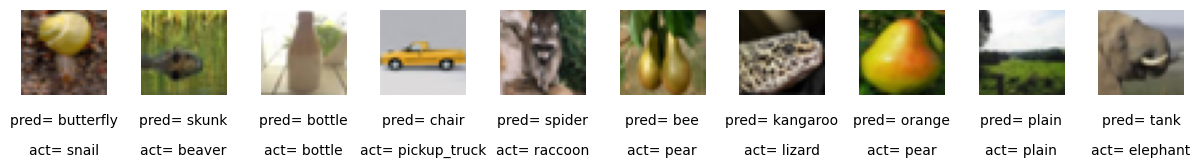

In [20]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1,n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred= '+str(preds_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act= '+str(actual_single[idx]),fontsize=10,ha='center',transform=ax.transAxes)
  ax.imshow(img)